In [1]:
import sys
# Minimum Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

if not cv.useOptimized():
 cv.setUseOptimized(True)

cv.useOptimized()

True

In [ ]:
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)
# 0 is for grayscale, -1: cv.IMREAD_UNCHANGED, 1 (default)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", img_grayscale)
cv.waitKey(0)  # keyboard binding function, wait for user's response
cv.destroyAllWindows()

In [2]:
def show_img(window_name, img):
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
img = cv.imread("images/lena.png")

show_img("lena", img)

In [ ]:
# show difference between jpeg and png images
img_jpeg = cv.imread("images/lena.jfif", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpg image: {img_jpeg.shape}")
print(f"The shape of png image: {img_png.shape}")

In [ ]:
!pip install imageio

In [ ]:
import imageio


GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB to BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

show_img("gif", imgs[0])

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150) #wait 150ms for user input
    
cv.destroyAllWindows()

In [ ]:
# a good way to load, display and save images
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("No such filepath!")
   
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF # receive correct input no matter the num lock is on or not
if k == ord('s'):
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()

In [ ]:
# Initiate an object
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
cap.release()
cv.destroyAllWindows()

In [ ]:
# use webcam. get the videos and save it on local dish
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam is detected")
    
# filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 15
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    out.write(frame)
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
cap.release()
out.release()
cv.destroyAllWindows()

In [ ]:
cap = cv.VideoCapture(0)
print(f"FPS of webcam: {cap.get(5)}")

In [ ]:
import time

In [ ]:
# Initiate an object
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
end = time.time()
# cap.release()
cv.destroyAllWindows()

In [ ]:
print(f"The fps: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The estimated fps using OpenCV: {n_frames / (end-start)}")

In [ ]:
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [ ]:
img.shape

In [ ]:
# 2nd method: scale factor
img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

# Exercise 1


In [3]:
# 1. Load and display the image 'dog.jfif'. Save the image in png format.
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF
if k == 115:
    cv.imwrite("images/dog_save.png", img)

cv.destroyAllWindows()

# Exercise 2


In [4]:
import matplotlib.pyplot as plt
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena", img)
show_img("grayscale", img_grayscale)

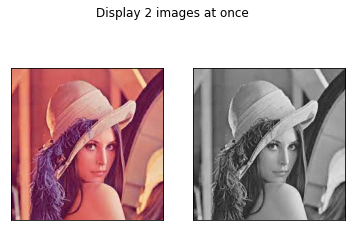

In [5]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.xticks([]),plt.yticks([])
plt.suptitle("Display 2 images at once")
plt.show()

In [6]:
# convert the grayscale to bgr
img_gray_bgr = cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack([img, img_gray_bgr])

show_img("img_combines", img_combined)

# Exercise 3

In [7]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened:
    sys.exit("The video fielpath is not correct")
    
# filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc(*'MP4V')
fps = int(cap.get(5))
w, h = int(cap.get(3)), int(cap.get(4))
smaller_w, smaller_h = int(w/2), int(h/3)
out = cv.VideoWriter("videos/smaller_img_pexels.mp4", fourcc, fps, (smaller_w, smaller_h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
        
    smaller_frame = cv.resize(frame, (smaller_w, smaller_h))
    cv.imshow("smaller frame", smaller_frame)
    out.write(smaller_frame)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

No frame received


# Exercise 4

In [12]:
# linear interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_LINEAR)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)


In [13]:
# cubic interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_CUBIC)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)

In [14]:
# nearest neighbour interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_NEAREST)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)